<a href="https://colab.research.google.com/github/Thrishal1105/Stock-Prediction/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

/tmp/ipython-input-2306659191.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600
2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
2010-01-07,6.321636,6.364265,6.275706,6.356760,477131200
2010-01-08,6.363665,6.364265,6.276007,6.313231,447610800


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.589775,68.650153,67.713081,67.751724,98572000
2019-12-24,68.654984,68.804728,68.328946,68.756422,48478800
2019-12-26,70.017113,70.034020,68.758831,68.787811,93121200
2019-12-27,69.990555,70.997669,69.584814,70.309354,146266000
2019-12-30,70.405945,70.688519,68.884414,69.908428,144114400


In [ ]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600
1,2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2,2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
3,2010-01-07,6.321636,6.364265,6.275706,6.356760,477131200
4,2010-01-08,6.363665,6.364265,6.276007,6.313231,447610800


In [ ]:
df = df.drop(['Date'], axis=1)
df.head()

/tmp/ipython-input-2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424604,6.439314,6.375672,6.407193,493729600
1,6.435712,6.472037,6.401789,6.442317,601904800
2,6.333344,6.461230,6.326740,6.435713,552160000
3,6.321636,6.364265,6.275706,6.356760,477131200
4,6.363665,6.364265,6.276007,6.313231,447610800


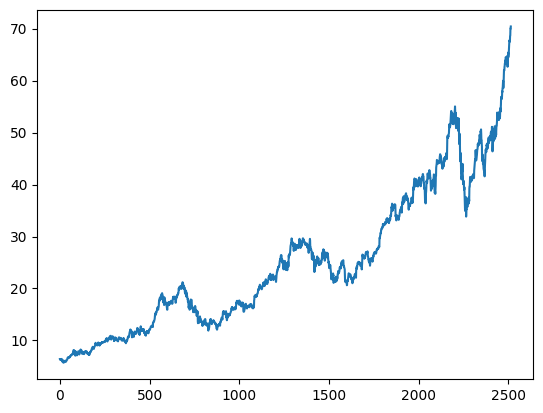

In [ ]:
plt.plot(df.Close)

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424604,6.439314,6.375672,6.407193,493729600
1,6.435712,6.472037,6.401789,6.442317,601904800
2,6.333344,6.461230,6.326740,6.435713,552160000
3,6.321636,6.364265,6.275706,6.356760,477131200
4,6.363665,6.364265,6.276007,6.313231,447610800
...,...,...,...,...,...
2510,68.589775,68.650153,67.713081,67.751724,98572000
2511,68.654984,68.804728,68.328946,68.756422,48478800
2512,70.017113,70.034020,68.758831,68.787811,93121200


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.073139
2511,57.270288
2512,57.506677
2513,57.734021


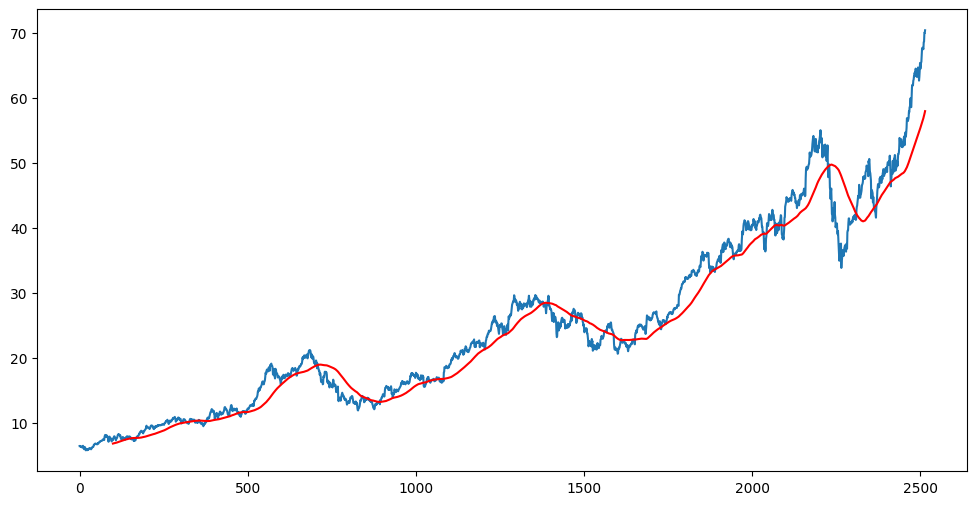

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.037092
2511,52.164217
2512,52.297196
2513,52.427630


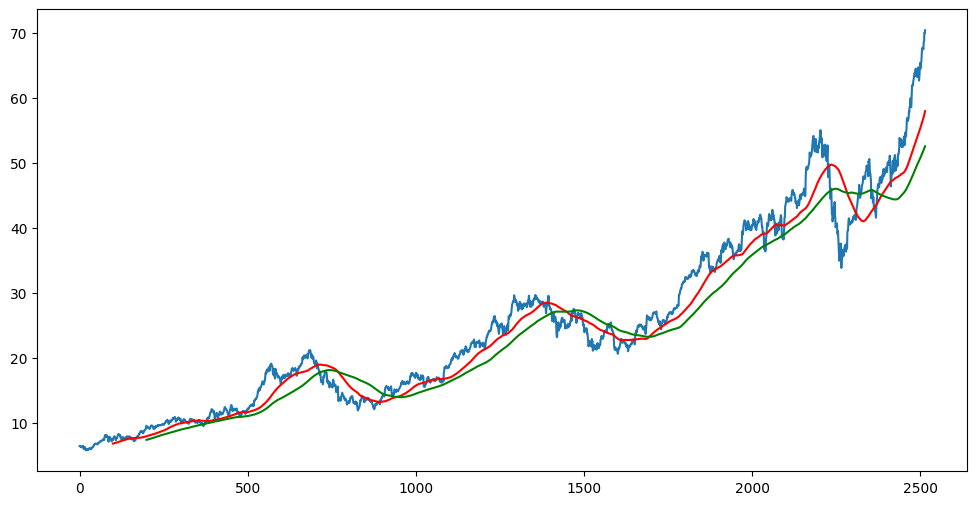

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [ ]:
df.shape

(2515, 5)

In [ ]:
#splitting data into training and testing
#training-70%
#testing-30%

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# Rename the 'Close' column to remove the 'Ticker' level
data_training.columns = ['Close']
data_testing.columns = ['Close']


print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,6.424604
1,6.435712
2,6.333344
3,6.321636
4,6.363665


In [ ]:
data_testing.head()

,Close
1760,26.930647
1761,26.720701
1762,26.796835
1763,26.766842
1764,26.902958


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02759998],
       [0.02806503],
       [0.02377926],
       ...,
       [0.88408394],
       [0.89123172],
       [0.88640217]])

In [ ]:
data_training_array.shape

(1760, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# **ML Model**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - loss: 0.1231
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0133
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0117
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0096
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0091
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0086
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0081
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0079
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0081
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0069
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0075
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0065
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0067
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0064
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0062
Ep

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1760,26.930647
1761,26.720701
1762,26.796835
1763,26.766842
1764,26.902958


In [ ]:
past_100_Days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_Days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,24.874207
1,24.975203
2,24.789278
3,24.773212
4,24.830597


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573556],
       [0.02789662],
       [0.0239183 ],
       [0.02357454],
       [0.02480242],
       [0.03118733],
       [0.03069603],
       [0.0299103 ],
       [0.02922274],
       [0.03059799],
       [0.02642321],
       [0.02809305],
       [0.02406588],
       [0.02180658],
       [0.01871235],
       [0.01812289],
       [0.01409581],
       [0.01458682],
       [0.01768093],
       [0.02259235],
       [0.02244493],
       [0.02568642],
       [0.01173815],
       [0.        ],
       [0.01134521],
       [0.02367286],
       [0.04243426],
       [0.06109747],
       [0.05790504],
       [0.05132399],
       [0.05127481],
       [0.05117657],
       [0.05643171],
       [0.04705105],
       [0.04788578],
       [0.04891732],
       [0.05314104],
       [0.04444795],
       [0.04872081],
       [0.04611787],
       [0.04847536],
       [0.04872081],
       [0.05284641],
       [0.0536814 ],
       [0.06345492],
       [0.06468288],
       [0.06979068],
       [0.068

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.0697382 , 0.06524589, 0.06687496, 0.06623318, 0.06914572,
       0.07556336, 0.08089481, 0.08148729, 0.08464658, 0.08217841,
       0.08114165, 0.08588087, 0.08583145, 0.08479469, 0.08588087,
       0.08627577, 0.08573264, 0.09516162, 0.0954578 , 0.09550714,
       0.09392741, 0.0925451 , 0.129076  , 0.12798998, 0.13070519,
       0.13667825, 0.14279951, 0.14531727, 0.15002756, 0.14853999,
       0.15434107, 0.16291817, 0.16534761, 0.16455438, 0.16638899,
       0.17124767, 0.17328045, 0.17040469, 0.17104928, 0.17238793,
       0.17268537, 0.18656772, 0.18245269, 0.18651834, 0.18433651,
       0.18522899, 0.18265087, 0.18106482, 0.18334517, 0.18364261,
       0.18260132, 0.18988961, 0.19102983, 0.18755947, 0.19484775,
       0.18681554, 0.19464941, 0.19217029, 0.19078226, 0.19197195,
       0.20644943, 0.20803589, 0.20709402, 0.20575537, 0.20595356,
       0.21125869, 0.2075401 , 0.20575537, 0.2041685 , 0.20332556,
       0.19569045, 0.19653331, 0.19281497, 0.19668219, 0.19355

In [ ]:
y_predicted

array([[0.13382368],
       [0.13447651],
       [0.13504966],
       [0.1355167 ],
       [0.13586885],
       [0.13610755],
       [0.13625625],
       [0.1363609 ],
       [0.13647012],
       [0.13661993],
       [0.1368396 ],
       [0.13713303],
       [0.1374942 ],
       [0.13792141],
       [0.13840218],
       [0.13891725],
       [0.1394453 ],
       [0.13996255],
       [0.14046429],
       [0.14096905],
       [0.14148745],
       [0.14202097],
       [0.14255832],
       [0.14313832],
       [0.14386997],
       [0.14479601],
       [0.14597753],
       [0.14746001],
       [0.14926891],
       [0.15140802],
       [0.15385741],
       [0.15658268],
       [0.15955994],
       [0.162763  ],
       [0.16614804],
       [0.169661  ],
       [0.17325284],
       [0.17687654],
       [0.18047471],
       [0.1839874 ],
       [0.18734804],
       [0.19051933],
       [0.1935026 ],
       [0.19630097],
       [0.19892257],
       [0.20136979],
       [0.2036423 ],
       [0.205

In [ ]:
scaler.scale_

array([0.02139748])

In [ ]:
scaler_factor = 1/0.02077868
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

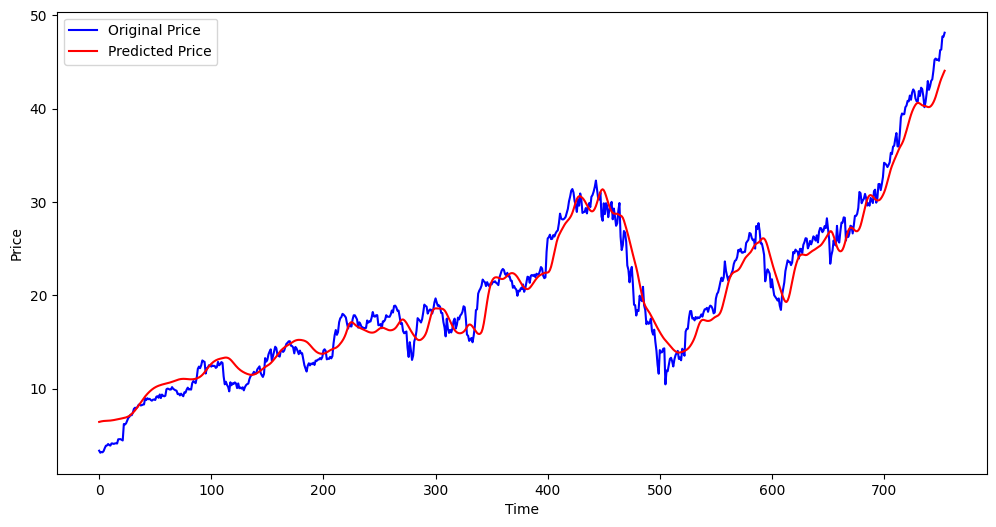

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()